# Jupyter Notebook for Demo

In [13]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

## Smartphone Performance Degradation (No repairing)

In [14]:
def degrade_performance(time_held, performance=1.0, decay_rate=0.0005):
    """
    Simulate the degradation of performance over time using an exponential decay model with Gaussian noise.
    """
    # Calculate the exponential decay
    decay_factor = math.exp(-decay_rate * time_held)
    performance = max(0, performance * decay_factor)
    # Add Gaussian noise to the performance
    noise = random.gauss(0, 0.0005)  # Mean of 0, standard deviation of 0.02
    performance = max(0, min(1, performance + noise))  # Ensure performance stays between 0 and 1
    # Update the status if the phone reaches a critical performance level or by random chance
    return performance

[1.0, 0.9993976729797026, 0.9979095806804202, 0.9964360939387539, 0.9940691182496179, 0.9912892884561927, 0.9867948136184048, 0.9831818947719575, 0.9795629125648927, 0.9747680169619207, 0.9706450811094361, 0.9653281931239099, 0.9590893730626198, 0.9515841017704264, 0.9446648812291395, 0.9374967017969416, 0.9292329304766542, 0.9218058547085303, 0.9138504102047554, 0.9053276109499713, 0.8965014463637345, 0.8865899207580993, 0.8769761552519612, 0.8673301696478957, 0.8573934408942828, 0.8469026573018541, 0.8359499171282219, 0.8251408466140339, 0.8135181099143982, 0.8009158756557138, 0.788919543561739, 0.7771776140223813, 0.7641045524260864, 0.7519822001029453, 0.740032601273529, 0.7282339237325166, 0.7154378084186256, 0.701980722311185, 0.6883777135226858, 0.6748941784937827, 0.6619610148180156, 0.6489752901139348, 0.6353879183214587, 0.6221846490029349, 0.6087596730358289, 0.5946094483292009, 0.5817603713361611, 0.5677186394363111, 0.5545088587443038, 0.5417471676937973, 0.527746853565007

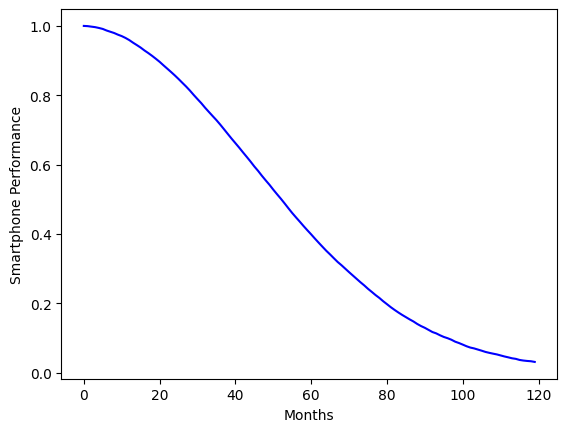

In [15]:
performance = 1.0
months = 120
degraded_perf = [performance]
for t in range(1, months):
    performance = degrade_performance(t, performance)
    degraded_perf.append(performance)
print(degraded_perf)
plt.plot(degraded_perf, 'b-')
plt.ylabel('Smartphone Performance')
plt.xlabel('Months')
plt.show()

## Smartphone Repairing function

In [16]:
def repair_product(repair_times, performance, time_held):
        """
        Attempt to repair the phone, with repair effectiveness influenced by time held and repair times.
        The more time held and repairs done, the less effective each repair becomes.
        """
        # Calculate repair effectiveness: The older the phone and the more repairs done, 
        # the less effective the repair is
        repair_effectiveness = max(0.1, 1 - (repair_times * 0.05) - (time_held * 0.001))
        # Random factor to simulate repair success (between 0 and 1)
        repair_success = random.random()
        # Repair success is influenced by repair effectiveness
        if repair_success < repair_effectiveness:
            # Each repair increases performance by a factor, but it's limited by the maximum performance
            performance_increase = 0.2 * (1 - performance)  # The closer to 1, the smaller the increase
            performance = min(1.0, performance + performance_increase)
        # Log the repair attempt
        return performance

[1.0, 0.9994454982794299, 0.9988525377555233, 0.9970111776892705, 0.9945664591426081, 0.9919336685382782, 0.9891731446399366, 0.9862096128944663, 0.9820714809703576, 0.9786664327531481, 0.9724792466435617, 0.9679132223629375, 0.9615017215080117, 0.955306582473244, 0.9486368988541994, 0.9413458896724055, 0.933613972095632, 0.9254951434789767, 0.9172056654096494, 0.9090917513686415, 0.9008482833470378, 0.8915371703598701, 0.8820652765813006, 0.8716192723263004, 0.860762914296108, 0.849084326778137, 0.8385545523362361, 0.8277078015631016, 0.8159247338988691, 0.8036184370701509, 0.7914618675333726, 0.8243583240907271, 0.8145592372022636, 0.7555795643040161, 0.7427643001055275, 0.729405042518347, 0.7730133141074977, 0.7622743863717759, 0.751884761084185, 0.7410996896646769, 0.6625742455528303, 0.7197992504675891, 0.7096360389632673, 0.6231836491312519, 0.6090530441830273, 0.5952575274798546, 0.582289739188812, 0.5689627147674509, 0.55545959762944, 0.5415933363470051, 0.6225341205842635, 0.6

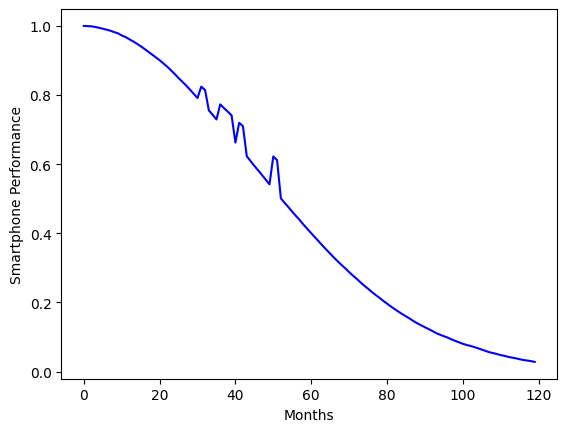

In [17]:
performance = 1.0
repair_times = 0
months = 120
degraded_perf = [performance]
for t in range(1, months):
    performance = degrade_performance(t, performance)
    if 0.4 <= performance <= 0.8:
        performance_r = repair_product(repair_times, performance, time_held=t)
        degraded_perf.append(performance_r)
        repair_times += 1
    else:
        degraded_perf.append(performance)

print(degraded_perf)
plt.plot(degraded_perf, 'b-')
plt.ylabel('Smartphone Performance')
plt.xlabel('Months')
plt.show()